In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import itertools
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_validate
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from wordcloud import WordCloud


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
dataset = pd.read_csv('/Users/heli/Desktop/Hoboken_restaurants_reviews.csv')

In [3]:
dataset = dataset.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)

In [5]:
dataset.head()

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5.0 star rating,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4.0 star rating,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5.0 star rating,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4.0 star rating,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5.0 star rating,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"


### EDA###

### EDA goals ###
### 1. make sure all the data is valid.###
### 2.summary data basic information ###


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/heli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stars=[]
for i in dataset['user_rating']:
    c=i[0]
    stars.append(c)

In [8]:
dataset['user_rating']=stars

In [9]:
dataset.head()

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"


In [10]:
dataset.isnull().values.any()

True

In [11]:
dataset.isnull().sum()

user_id                0
user_name              0
user_rating            0
user_text              0
restaurant_name        0
restaurant_rating      0
restaurant_price     132
restaurant_type        0
dtype: int64

### There are some missing values in the restaurant_price

In [12]:
dataset.count()

user_id              74611
user_name            74611
user_rating          74611
user_text            74611
restaurant_name      74611
restaurant_rating    74611
restaurant_price     74479
restaurant_type      74611
dtype: int64

In [13]:
dataset.nunique()

user_id              44949
user_name            24781
user_rating              5
user_text            69542
restaurant_name        302
restaurant_rating        7
restaurant_price         4
restaurant_type        230
dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74611 entries, 0 to 74610
Data columns (total 8 columns):
user_id              74611 non-null object
user_name            74611 non-null object
user_rating          74611 non-null object
user_text            74611 non-null object
restaurant_name      74611 non-null object
restaurant_rating    74611 non-null object
restaurant_price     74479 non-null object
restaurant_type      74611 non-null object
dtypes: object(8)
memory usage: 4.6+ MB


### rating distrubution### 

In [15]:
x=dataset['user_rating'].value_counts()
x=x.sort_index()

In [16]:
x

1     6608
2     6245
3    10916
4    23140
5    27702
Name: user_rating, dtype: int64

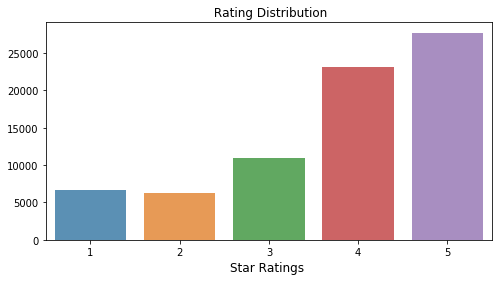

In [17]:
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title(" Rating Distribution")
plt.xlabel('Star Ratings ', fontsize=12)
plt.show()

### restaurant type###

In [18]:
restaurant_type=' '.join(dataset['restaurant_type'])
types=pd.DataFrame(restaurant_type.split(','),columns=['res_type'])
x=types.res_type.value_counts()
print("There are ",len(x)," different types of restaurants in Yelp!")

x = x.sort_values(ascending=False)
x = x.iloc[0:50]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("What are the top types?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)


There are  448  different types of restaurants in Yelp!


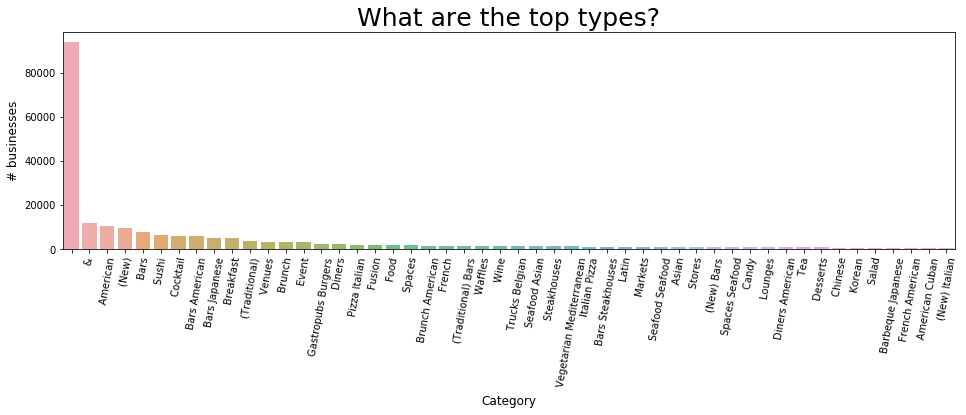

In [19]:
plt.show()

cause there are a lot of types, so i choose the top 50 types 

### total reviews ###

In [19]:
cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(dataset['user_text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

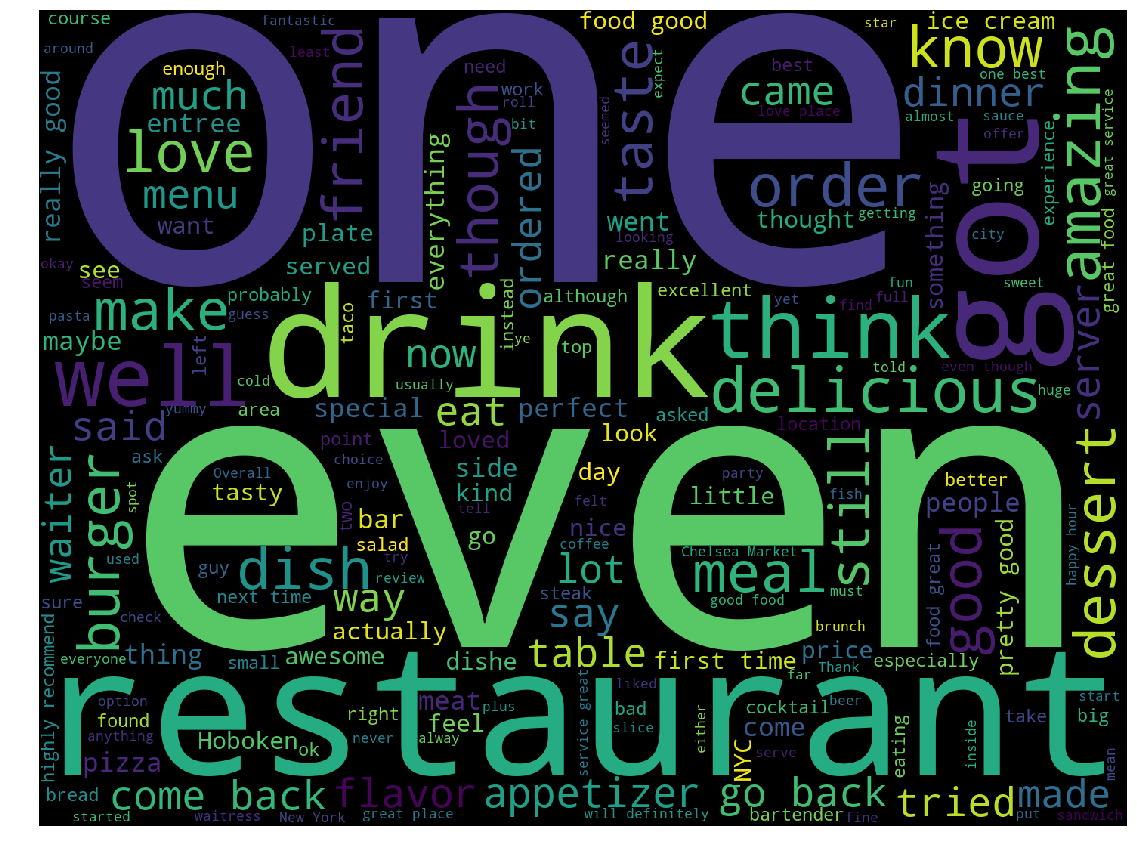

In [20]:
plt.show()

### Cause it is hard to see some meaingful words, so now i want to classifier the rating in 3 levels , to find each level feature###

In [20]:
rating_level = ['low', 'mid','high']
def new_level(y):
    if y<'3':
        return rating_level[0]
    
    if y=='3':
        return rating_level[1]
    if y>'3':
        return rating_level[2]
    
dataset['rating_level'] = dataset['user_rating'].apply(new_level)

dataset.head()
        

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type,rating_level
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high


In [21]:
x=dataset['rating_level'].value_counts()
x=x.sort_index()

In [22]:
x

high    50842
low     12853
mid     10916
Name: rating_level, dtype: int64

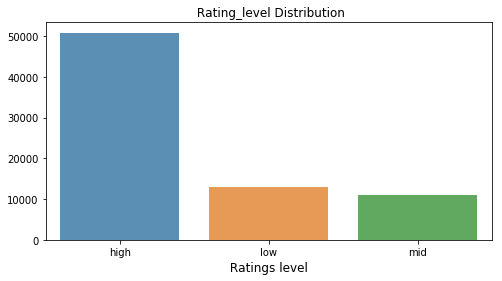

In [23]:
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title(" Rating_level Distribution")
plt.xlabel(' Ratings level ', fontsize=12)
plt.show()

### cause the total wordcloud cannot see some sapecial words, so i need clean words##

In [24]:
clean_review = []
for i in range(0, 74611):
    review = re.sub('[^a-zA-Z]', ' ', dataset['user_text'][i])

    review = review.lower()

    review = review.split()

    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = [word for word in review if not word in ['place','resturant','one','get','food','drink','table','order','restaur','tabl','go','said','tri','frined','realli','dish','tast','come','ask','even']]
    review = ' '.join(review)
    clean_review.append(review) 

In [25]:
dataset['cleaned_review']=clean_review

In [26]:
dataset.to_csv('review_cleaned')

In [27]:
dataset=pd.read_csv('review_cleaned')

#### save to csv 

In [29]:
high_level = dataset[dataset['rating_level'] == 'high']


high level


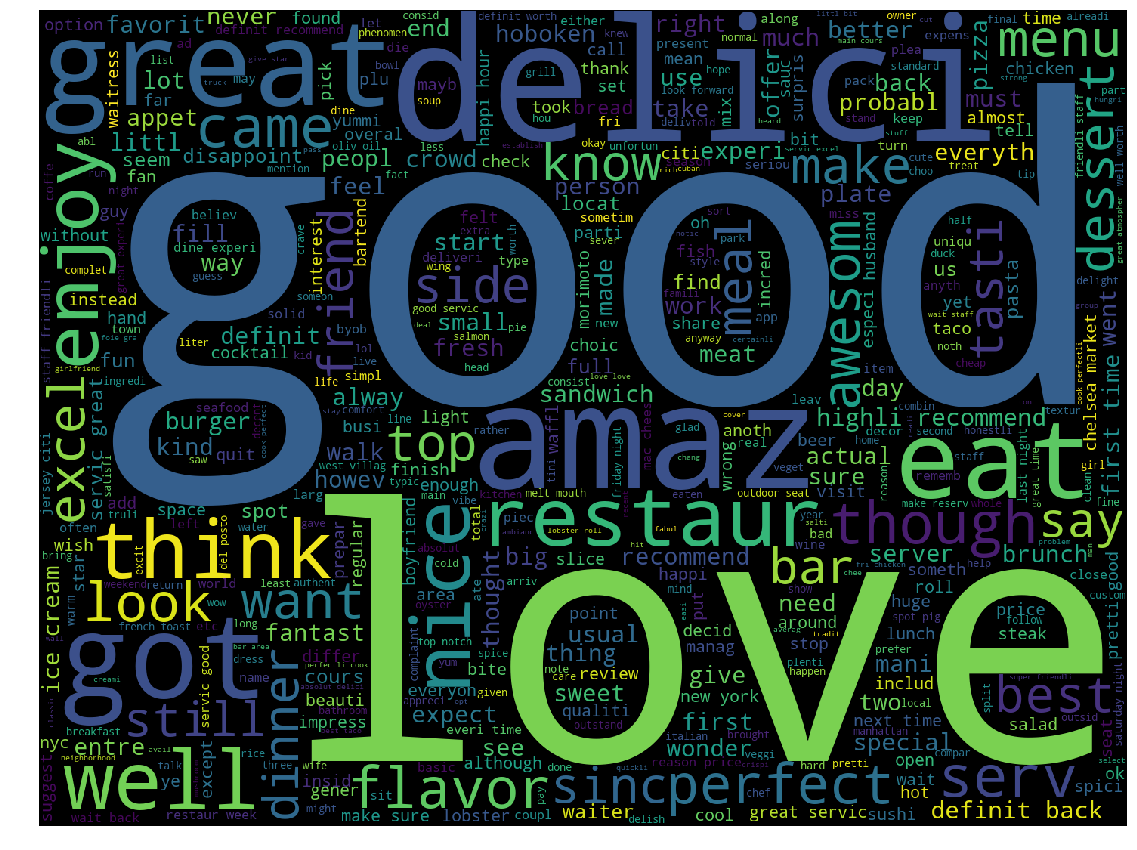

In [30]:
print('high level')
cloud = WordCloud(width=1440, height= 1080,max_words= 500).generate(' '.join(high_level['cleaned_review'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [31]:
mid_level = dataset[dataset['rating_level'] == 'mid']

mid level


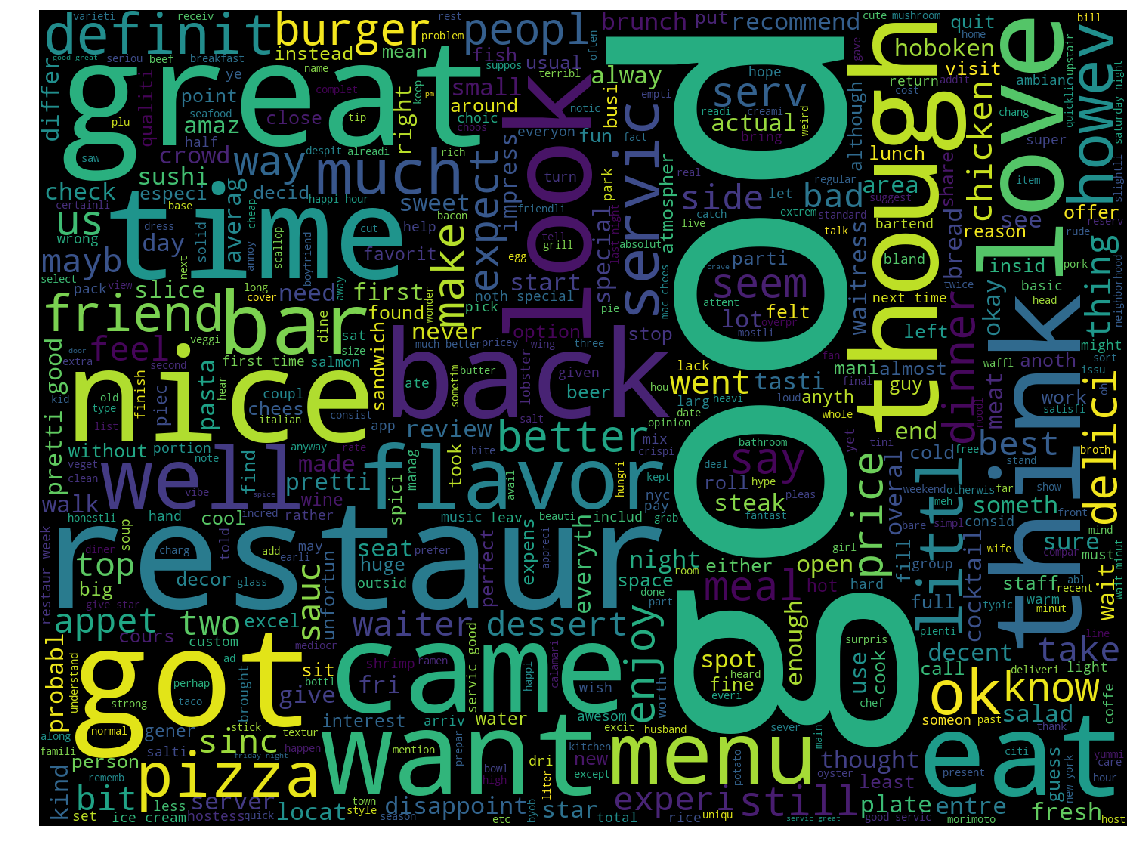

In [32]:
print('mid level')
cloud = WordCloud(width=1440, height= 1080,max_words= 500).generate(' '.join(mid_level['cleaned_review'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [33]:
low_level = dataset[dataset['rating_level'] == 'low']

low level


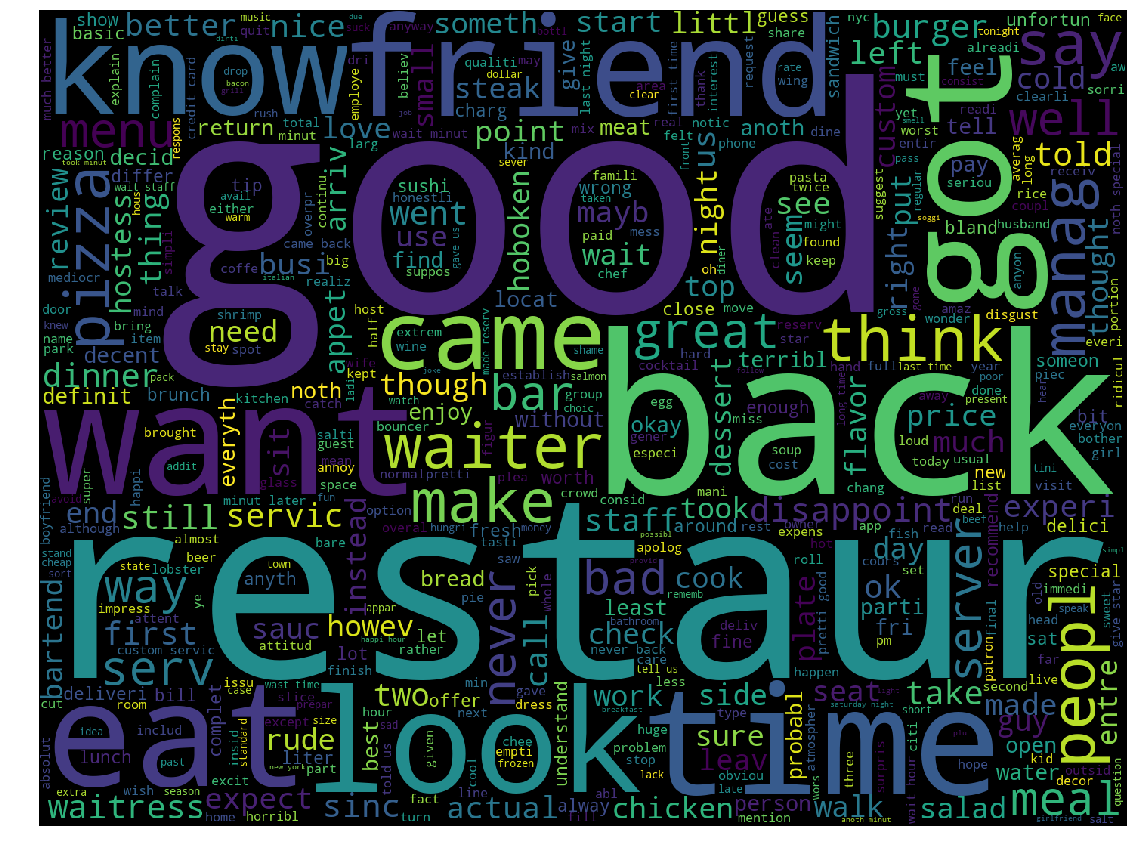

In [34]:
print('low level')
cloud = WordCloud(width=1440, height= 1080,max_words= 500).generate(' '.join(low_level['cleaned_review'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

###  user ###

In [28]:
len(dataset.user_name.unique())

24781

In [29]:
len(dataset.user_id.unique())

44949

In [37]:
user_name = pd.DataFrame(dataset.user_name.value_counts().head(20))
user_name.reset_index(level=0, inplace = True)
user_name.columns = ['name','count']
user_name

,name,count
0,Nicholas G.,103
1,David S.,91
2,David C.,87
3,John M.,80
4,Jessica W.,79
5,Alison C.,78
6,Melissa M.,77
7,Dave F.,73
8,Alex C.,71
9,Nicole S.,70


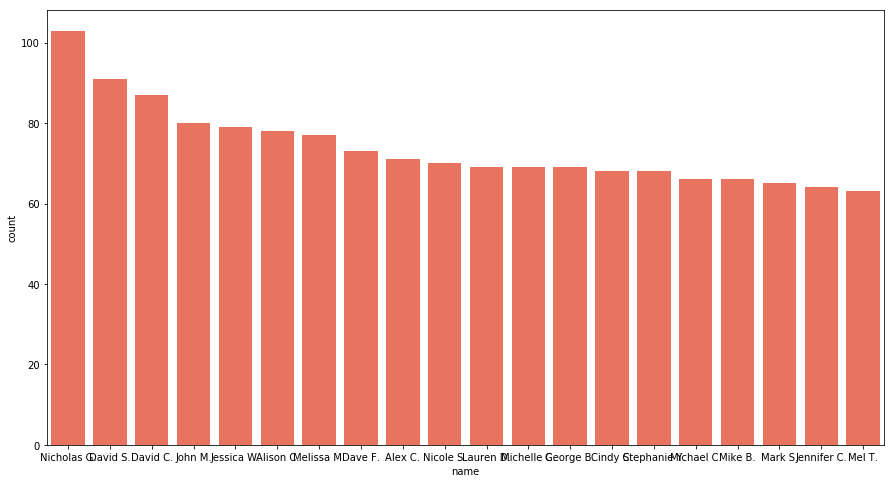

In [38]:
f,ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="name", y="count", data=user_name, color="tomato",ax = ax)
plt.show()

In [39]:
user_id = pd.DataFrame(dataset.user_id.value_counts().head(10))
user_id.reset_index(level=0, inplace = True)
user_id.columns = ['id','count']
user_id

,id,count
0,QxTNaHoxTL8f7jAK5nwQ1g,101
1,5aZX8bTiD0k9vR60SG588Q,76
2,GRY2acZtI5q4P1KdCWhcUQ,66
3,LcWOq7p7Mhtv9hIlDrhy9A,62
4,Y59HQNazSLR1EUMUmMOaFg,61
5,NWLqOKl0Vxi7qK-6EoBLbg,60
6,svFycHjXZYpNVutZ_0_gDQ,59
7,A5dqSwriUs8cV4DEzS_V9A,59
8,dl4ENy4Bk6-lCu59A8vxbg,57
9,94V-snVUg2Gd-OPd7rcZEg,54


#### let us find price with rating relationship ###

In [30]:
dataset.isnull().sum()

Unnamed: 0             0
user_id                0
user_name              0
user_rating            0
user_text              0
restaurant_name        0
restaurant_rating      0
restaurant_price     132
restaurant_type        0
rating_level           0
cleaned_review         1
dtype: int64

#### We can find in the resturant columns, there are some missing values, so drop these valuse####

In [31]:
dataset.dropna(axis=0, how='any',inplace=True)

In [32]:
dataset.isnull().sum()

Unnamed: 0           0
user_id              0
user_name            0
user_rating          0
user_text            0
restaurant_name      0
restaurant_rating    0
restaurant_price     0
restaurant_type      0
rating_level         0
cleaned_review       0
dtype: int64

#### now visualation ###

In [38]:
price = pd.DataFrame(dataset.restaurant_price.value_counts().head(20))
price.reset_index(level=0, inplace = True)
price.columns = ['dollar','count']
price

,dollar,count
0,2,38322
1,3,19809
2,1,10567
3,4,5780


In [39]:
f,ax = plt.subplots(figsize=(4, 4))

sns.barplot(x="dollar", y="count", data=price, color="tomato",ax = ax)


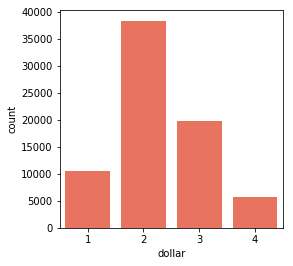

In [40]:
plt.show()

### EDA Summary 
#### 1.There have 74611 reviews in Hoboken
#### 2.There are 44946 users have user ID
#### 4.There are 24781 users wrote their name
#### 5.There are 302 resturants in Hoboken
#### 6.There are 230 different resturant types in Hoboken
#### 7.Review rating : High-50842, Mid-10916, Low-12853
#### 8.There are 132 missing values in resturant_price columns
#### 9.There are 38322 reviews about 2 dollars resturants, 19809 reviews about 3 dollars resturants, 10567 reviiews about 1 dollar resturants, 5780 reviews about 4 dollars resturants.
#### 10. Nicholas write the most reviews(103)

